# Predictive Models
This notebook is to examine the performance of various models. For model exploration, refer to the model's notebook within the [notebooks](notebooks) folder. The models are in the following order:

1. **Logistic Regression**
    * Random Under-sampling
    * SVM-SMOTE (Synthetic Minority Over-sampling Technique)
1. **Random Forest**
    * Random Under-sampling
    * TF-IDF and Random Under-sampling
1. **Support Vector Machine**
    * Random Under-sampling
1. **Word2Vec**
    * Latent Dirichlet Allocation (LDA), Logistic Regression
    * Logistic Regression and Random Under-sampling
    * LDA, Logistic Regression, and Random Under-sampling

In [1]:
# import libraries
from dotenv import load_dotenv, find_dotenv
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
# define project root directory
PROJ_ROOT = os.path.join(os.pardir)

# define source directory
src_dir = os.path.join('src')
sys.path.append(src_dir)

In [29]:
# import project modules
from features.build_features import clean_and_tokenize
from visualization.visualize import plot_confusion_matrix, draw_roc_curve
from models.train_model import load_and_split_df, logistic_regression, random_forest_undersampler, svm_text_classification

In [5]:
%load_ext watermark
%watermark -a "E. Chris Lynch" -d -t -v -p numpy,pandas,matplotlib,gensim,nltk,sklearn,imblearn

E. Chris Lynch 2019-02-14 16:33:25 

CPython 3.7.1
IPython 7.2.0

numpy 1.15.4
pandas 0.24.0
matplotlib 3.0.2
gensim 3.7.1
nltk 3.4
sklearn 0.20.2
imblearn 0.4.3


In [6]:
# locate CSV file
data_file =  'data/processed/clinic_train_data.csv'

# split into train and test sets
X_train, X_test, y_train, y_test = load_and_split_df(data_file)

## Logistic Regression
### Random Under-sampling

In [8]:
# define Count Vectorizer parameters
vec_params = {'max_features': 3000, 'tokenizer': clean_and_tokenize, 'stop_words': 'english'}

# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='rus')

Confusion matrix, without normalization
[[7942 3155]
 [ 304  407]]


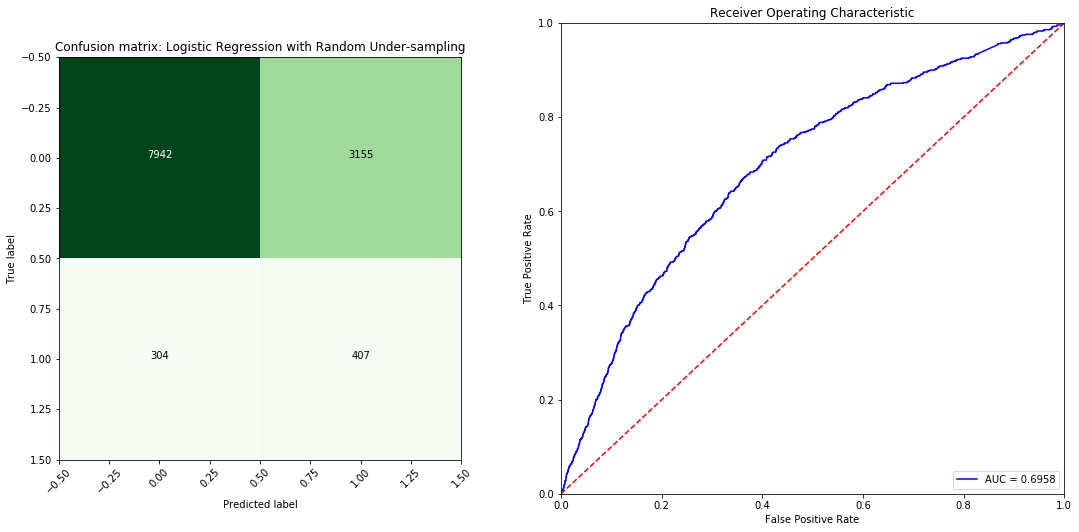

In [9]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with Random Under-sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

### SVM-SMOTE

In [13]:
# define logistic regression parameters
lr_params = {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 700, 'random_state': 42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = logistic_regression(vec_params=vec_params, lr_params=lr_params, 
                                                         train_feat=X_train, train_label=y_train,
                                                         test_feat=X_test, test_label=y_test,
                                                         model='svmsmote')

Confusion matrix, without normalization
[[10631   466]
 [  625    86]]


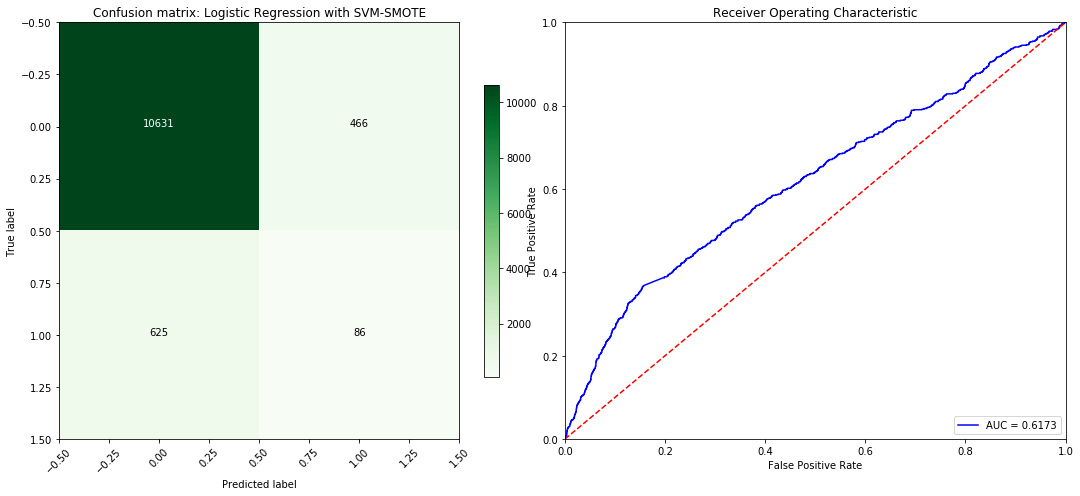

In [14]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Logistic Regression with SVM-SMOTE', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)
    
plt.show()

## Random Forest
### Random Under-sampling

In [23]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[6818 4279]
 [ 208  503]]


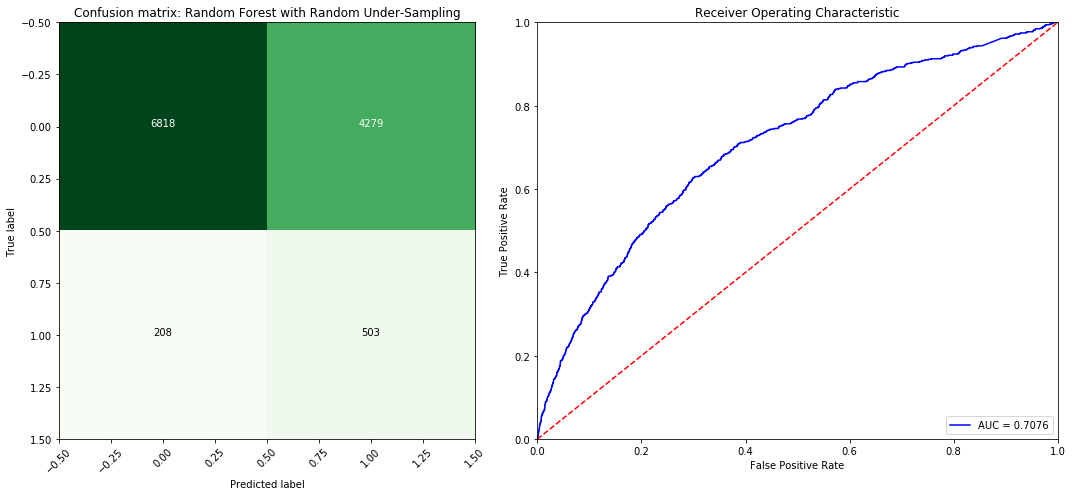

In [24]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

### TF-IDF and Random Under-sampling

In [26]:
# define logistic regression parameters
rf_params = {'n_estimators':500, 'max_depth':25, 'random_state':42}

# train and fit the model
pipe, pipe_fit, y_pred, cnf_matrix = random_forest_undersampler(vec_params=vec_params, rf_params=rf_params,
                                                                train_feat=X_train, train_label=y_train,
                                                                test_feat=X_test, test_label=y_test, tfidf=True)

Confusion matrix, without normalization
[[7162 3935]
 [ 228  483]]


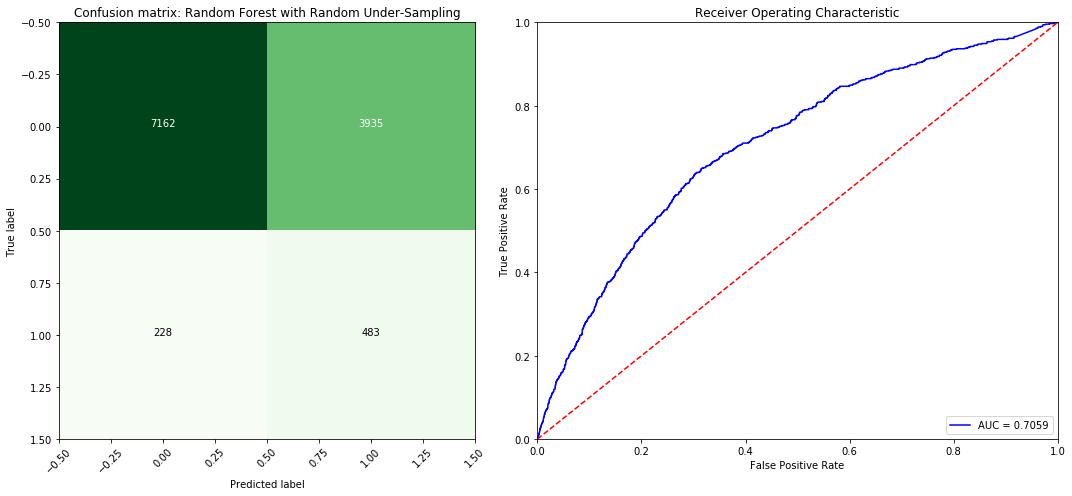

In [27]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                          title='Confusion matrix: Random Forest with Random Under-Sampling', 
                          cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe, features=X_test, target=y_test, ax=ax2)

plt.tight_layout()
plt.show()

## Support Vector Machine

In [31]:
# define SVM parameters
svm_params = {'C':1.0, 'gamma':'scale', 'probability':True, 'random_state':42}

# train and fit SVM model
pipe_svm, pipe_fit_svm, y_pred_svm, cnf_matrix_svm = svm_text_classification(vec_params=vec_params, svm_params=svm_params,
                                                                             train_feat=X_train, train_label=y_train,
                                                                             test_feat=X_test, test_label=y_test)

Confusion matrix, without normalization
[[7400 3697]
 [ 256  455]]


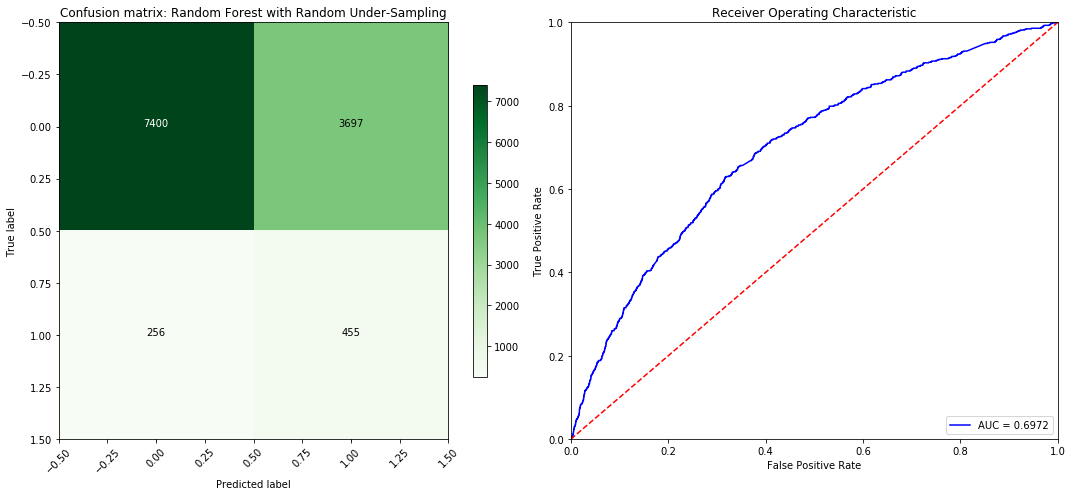

In [36]:
plt.figure(figsize=(15, 7))
    
# plot confusion matrix
ax1 = plt.subplot(121)
plot_confusion_matrix(cnf_matrix_svm, classes=['No Readmission','Readmission'],
                      title='Confusion matrix: Random Forest with Random Under-Sampling', 
                      cmap=plt.cm.Greens, ax=ax1)
# plot ROC curve
ax2 = plt.subplot(122)
draw_roc_curve(model=pipe_svm, features=X_test, target=y_test, ax=ax2)

plt.tight_layout(w_pad=0.01)
plt.show()

## Word2Vec
### Latent Dirichlet Allocation